# Visual testing

Test trained models on sample images.

5 5 10

0: 128x224 1 croissant, 28.2ms
Speed: 0.9ms preprocess, 28.2ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)


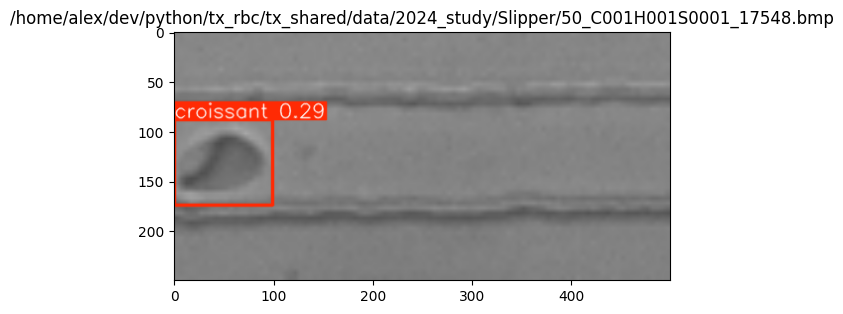


0: 128x224 2 croissants, 29.4ms
Speed: 1.5ms preprocess, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


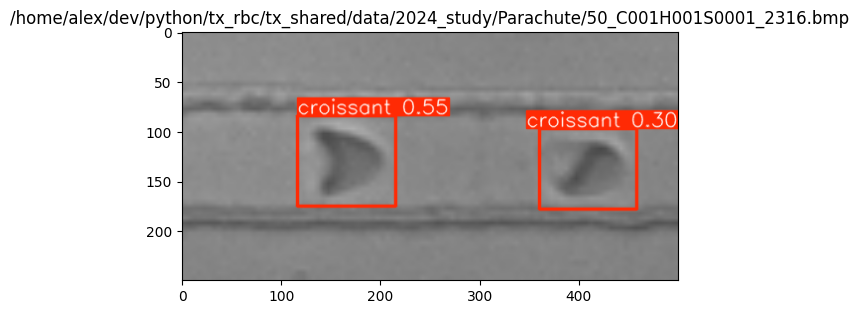


0: 128x224 1 croissant, 54.0ms
Speed: 1.4ms preprocess, 54.0ms inference, 4.5ms postprocess per image at shape (1, 3, 128, 224)


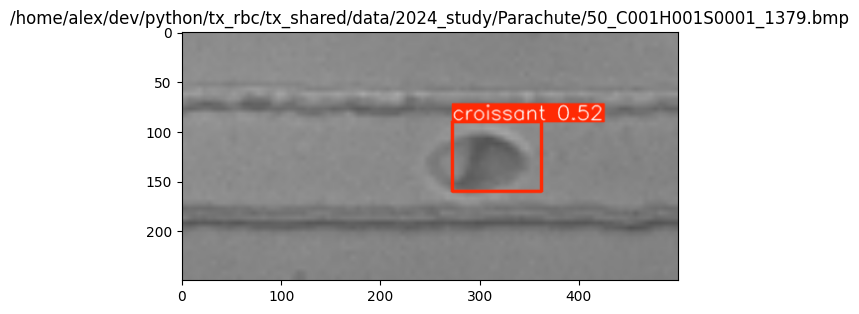


0: 128x224 1 croissant, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 224)


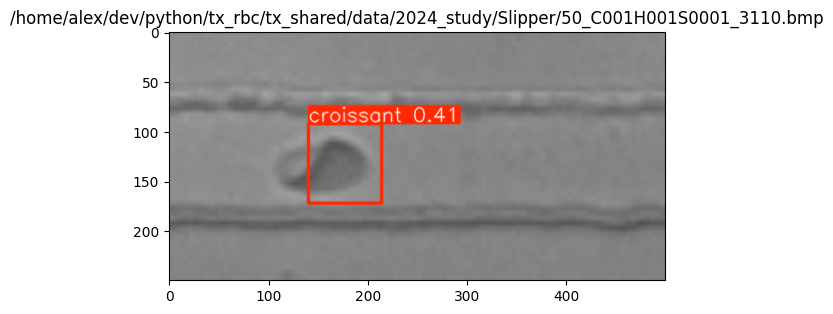


0: 128x224 1 slipper, 26.9ms
Speed: 2.2ms preprocess, 26.9ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)


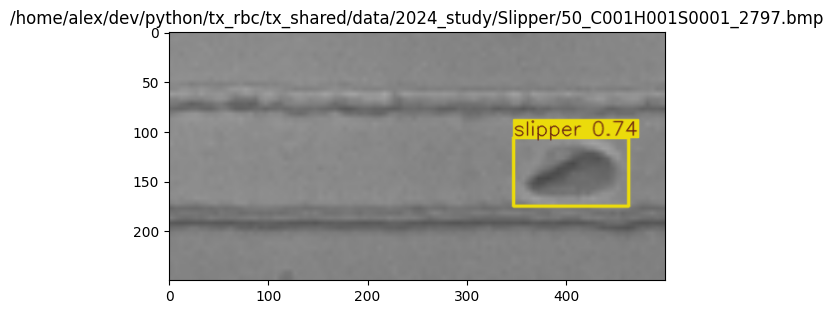


0: 128x224 1 slipper, 68.3ms
Speed: 1.0ms preprocess, 68.3ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)


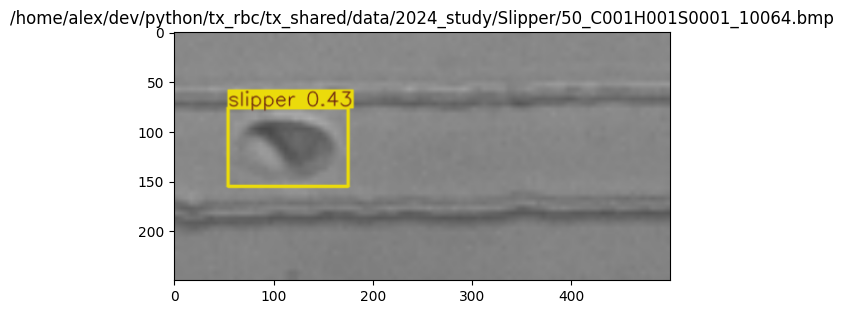


0: 128x224 1 croissant, 22.9ms
Speed: 0.4ms preprocess, 22.9ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 224)


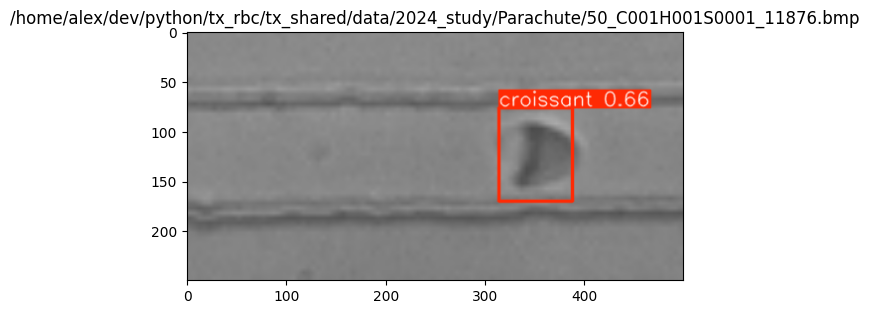


0: 128x224 1 croissant, 25.3ms
Speed: 0.5ms preprocess, 25.3ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)


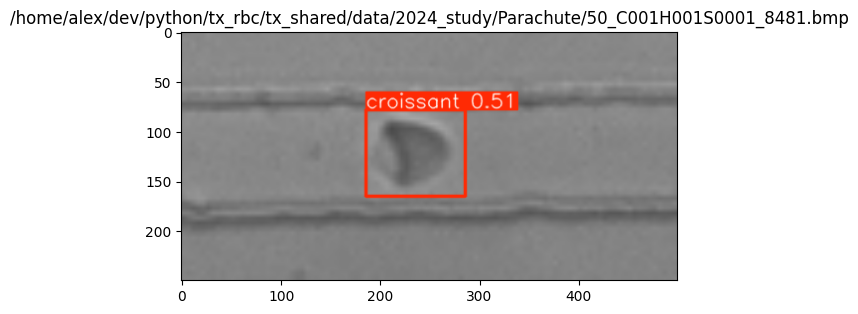


0: 128x224 1 croissant, 26.6ms
Speed: 0.7ms preprocess, 26.6ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 224)


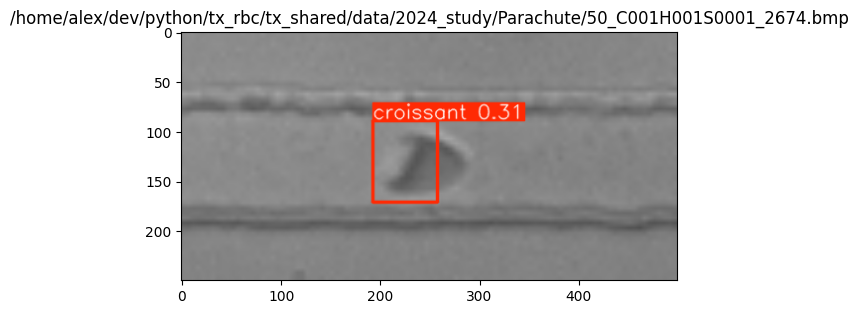


0: 128x224 1 slipper, 26.9ms
Speed: 1.2ms preprocess, 26.9ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 224)


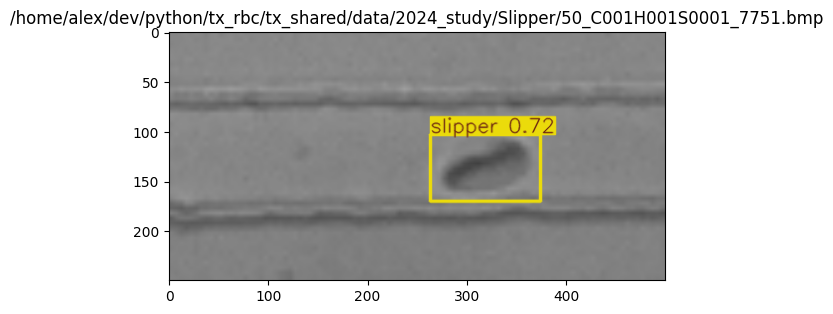

In [18]:
from ultralytics import YOLO
from cv2 import resize, imread
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Create a new YOLO model from scratch
#model = YOLO("yolo11s.pt")

# Load a pretrained YOLO model (recommended for training)
#model = YOLO("/content/drive/MyDrive/04_Projets/99_UTC/GI04/TX_RBC/best.pt")
model = YOLO("/home/alex/dev/python/tx_rbc/tx_shared/notebooks/runs/detect/200x100_noises_2shapes/weights/best_e100.pt")


# Perform object detection on an image using the model
input_path_synthetic = '/content/drive/MyDrive/04_Projets/99_UTC/GI04/TX_RBC/dataset/synthetic/test/images'
input_path_2024_def = '/home/alex/dev/python/tx_rbc/tx_shared/data/2024_study/'

input_path = input_path_2024_def

images_croissants = [os.path.join(input_path, "Parachute", file) for file in os.listdir(os.path.join(input_path, "Parachute")) if file.endswith('bmp')]
images_slippers = [os.path.join(input_path, "Slipper", file) for file in os.listdir(os.path.join(input_path, "Slipper")) if file.endswith('bmp')]
#print(images_croissants[0])
#input_img = imread(images_croissants[np.random.randint(0, len(images))])
#print(f"Input has shape: {input_img.shape}")

subset_croissants = random.sample(images_croissants, 5)
subset_slippers = random.sample(images_slippers, 5)

print(len(subset_croissants), len(subset_slippers), len(subset_croissants + subset_slippers))
images = subset_croissants + subset_slippers
random.shuffle(images)

for image in images[:10]:
    input_img = imread(image)
    plt.figure()
    input_img = resize(input_img, None, fx=5, fy=5)
    results = model(input_img, device='cpu')
    plt.imshow(results[0].plot())
    plt.title(image)
    plt.show()
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        #result.show()  # display to screen
        #input("Press enter")

100%|█████████████████████████████████████████████████████████████████| 1123/1123 [00:27<00:00, 40.91it/s]



Confusion Matrix:


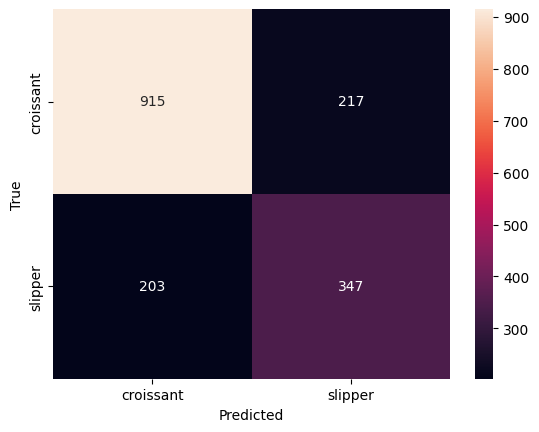


Classification Report:
              precision    recall  f1-score   support

   croissant       0.82      0.81      0.81      1132
     slipper       0.62      0.63      0.62       550

    accuracy                           0.75      1682
   macro avg       0.72      0.72      0.72      1682
weighted avg       0.75      0.75      0.75      1682


Detection Count Stats:
Total Images: 1123
Total Detections: 1682
Mean detections/image: 1.50
Median detections/image: 1.00
Max detections/image: 6

Images with mixed detections (2+ classes predicted): 248
- 50_C001H001S0001_6408.bmp | True: croissant | Predicted: ['croissant', 'slipper']
- 50_C001H001S0001_6458.bmp | True: croissant | Predicted: ['croissant', 'slipper']
- 50_C001H001S0001_16469.bmp | True: croissant | Predicted: ['croissant', 'slipper']
- 50_C001H001S0001_16470.bmp | True: croissant | Predicted: ['croissant', 'slipper']
- 50_C001H001S0001_2438.bmp | True: croissant | Predicted: ['croissant', 'slipper']
- 50_C001H001S0001_10

In [25]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from ultralytics import YOLO
from cv2 import resize, imread
from tqdm import tqdm

# Load model
model = YOLO("/home/alex/dev/python/tx_rbc/tx_shared/notebooks/runs/detect/200x100_noises_2shapes/weights/best_e100.pt")

# Paths
input_path = '/home/alex/dev/python/tx_rbc/tx_shared/data/2024_study/'
parachute_path = os.path.join(input_path, "Parachute")
slipper_path = os.path.join(input_path, "Slipper")
images_croissants = [os.path.join(parachute_path, file) for file in os.listdir(parachute_path) if file.endswith('bmp')]
images_slippers = [os.path.join(slipper_path, file) for file in os.listdir(slipper_path) if file.endswith('bmp')]

all_images = [(img, 'croissant') for img in images_croissants] + [(img, 'slipper') for img in images_slippers]

# Initialize counters
all_true = []
all_pred = []
detection_counts = []
mixed_detections = []

per_image_stats = []

# Run predictions
for image_path, true_class in tqdm(all_images):
    img = imread(image_path)
    img_resized = resize(img, None, fx=5, fy=5)
    results = model(img_resized, device='cpu',verbose=False)[0]

    detections = results.boxes.cls.cpu().numpy() if results.boxes else []
    pred_names = [results.names[int(cls)] for cls in detections]

    # Logging for stats
    detection_counts.append(len(pred_names))
    all_true.extend([true_class] * len(pred_names))
    all_pred.extend(pred_names)

    # Check if there is class confusion in a single image
    unique_preds = set(pred_names)
    if len(unique_preds) > 1:
        mixed_detections.append((image_path, true_class, list(unique_preds)))

    # Store per image stats
    per_image_stats.append({
        'image': image_path,
        'true_class': true_class,
        'num_detections': len(pred_names),
        'predicted_classes': Counter(pred_names)
    })

# === STATS ===

# Confusion Matrix
print("\nConfusion Matrix:")
labels = ['croissant', 'slipper']
cm = confusion_matrix(all_true, all_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(all_true, all_pred, target_names=labels))

# Detection count stats
counts = np.array(detection_counts)
print("\nDetection Count Stats:")
print(f"Total Images: {len(all_images)}")
print(f"Total Detections: {len(all_pred)}")
print(f"Mean detections/image: {np.mean(counts):.2f}")
print(f"Median detections/image: {np.median(counts):.2f}")
print(f"Max detections/image: {np.max(counts)}")

# Mixed detection info
print(f"\nImages with mixed detections (2+ classes predicted): {len(mixed_detections)}")
for path, true_type, preds in mixed_detections:
    print(f"- {os.path.basename(path)} | True: {true_type} | Predicted: {preds}")

# Optional: save per-image stats to a CSV
import pandas as pd
df_stats = pd.DataFrame(per_image_stats)
df_stats.to_csv("per_image_detection_stats.csv", index=False)


/tmp/ipykernel_69470/3171031218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pred_counter.keys()), y=list(pred_counter.values()), palette='Set2')


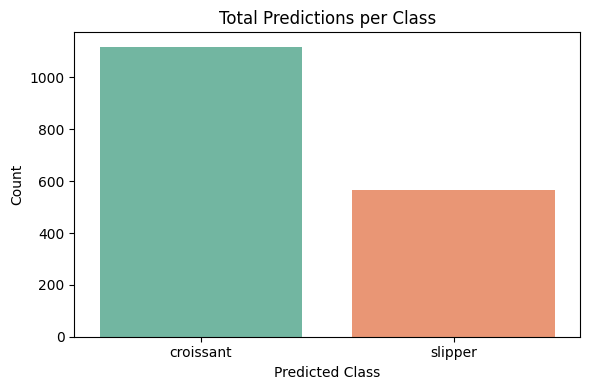

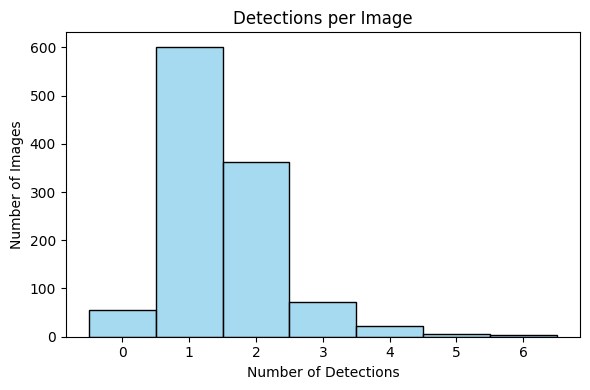

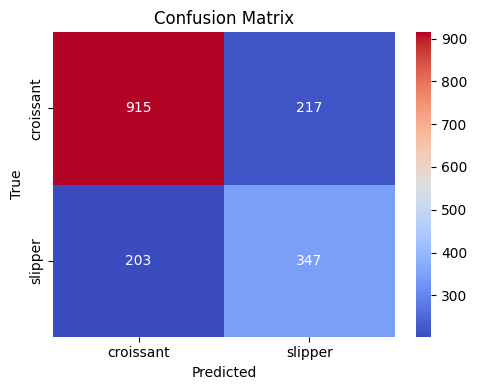

/tmp/ipykernel_69470/3171031218.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mixed_true_counts.keys()), y=list(mixed_true_counts.values()), palette="pastel")


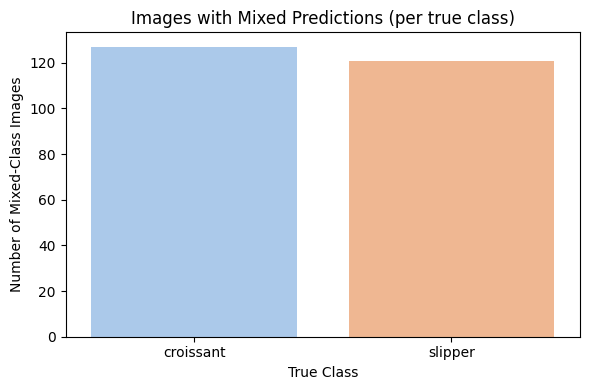

In [27]:
# Convert to DataFrame
df_stats = pd.DataFrame(per_image_stats)

# 1. Class Distribution of Predictions
pred_counter = Counter(all_pred)
plt.figure(figsize=(6,4))
sns.barplot(x=list(pred_counter.keys()), y=list(pred_counter.values()), palette='Set2')
plt.title("Total Predictions per Class")
plt.ylabel("Count")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

# 2. Histogram of Detections per Image (with centered bars)
plt.figure(figsize=(6,4))
bins = range(0, max(detection_counts)+2)  # Coverage of full range
sns.histplot(detection_counts, bins=bins, kde=False, color="skyblue", discrete=True)
plt.xticks(range(0, max(detection_counts)+1))  # Set ticks to exact integers
plt.title("Detections per Image")
plt.xlabel("Number of Detections")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


# 3. Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 4. Mixed Detections Count (Bar Plot)
mixed_true_counts = Counter([true_type for _, true_type, _ in mixed_detections])
plt.figure(figsize=(6,4))
sns.barplot(x=list(mixed_true_counts.keys()), y=list(mixed_true_counts.values()), palette="pastel")
plt.title("Images with Mixed Predictions (per true class)")
plt.xlabel("True Class")
plt.ylabel("Number of Mixed-Class Images")
plt.tight_layout()
plt.show()
